In [1]:
import pygeostat as gs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

In [3]:
data = gs.DataFile('sd_example.dat', x='X', y='Y', z='Z')

In [4]:
data.head()

,X,Y,Z,code,indicators_rt_0,indicators_rt_100,indicators_rt_200,signed_distances_rt_0,signed_distances_rt_100,signed_distances_rt_200
0,178.0,110.0,0.0,100.0,0.0,1.0,0.0,21.189621,-21.189621,87.143562
1,161.0,108.0,0.0,100.0,0.0,1.0,0.0,25.079872,-25.079872,70.064255
2,0.0,201.0,0.0,0.0,1.0,0.0,0.0,-24.000000,76.000000,24.000000
3,139.0,179.0,0.0,0.0,1.0,0.0,0.0,-23.706539,53.851646,23.706539
4,0.0,24.0,0.0,100.0,0.0,1.0,0.0,126.000000,-67.364677,67.364677


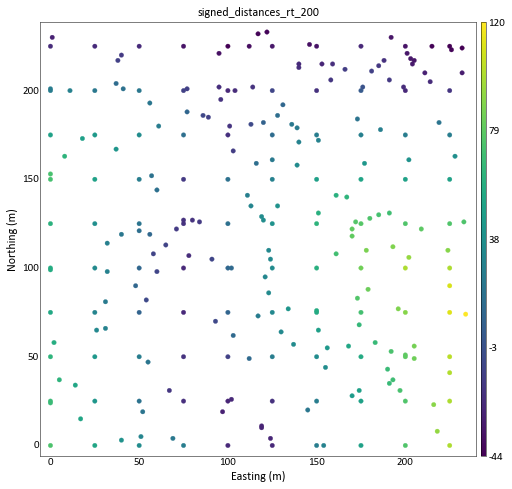

In [5]:
_ = gs.location_plot(data, var='signed_distances_rt_200')

In [6]:
def sqrt_coef(vertice, p):
    h = vertice[0]
    k = vertice[1]
    a = (p[1]-k)/np.sqrt(p[0]-h)
    
    return a, h, k

In [7]:
def line_coef(p1, p2):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1     
    
    return a, b

In [8]:
def plt_fcd(sd, f_min_o, f_min_p, f='linear', lan='pt'):
    sd_min = np.min(sd)
    sd_max = np.max(sd)
    
    plt.figure(figsize=(10,3))
    plt.plot([sd_min, sd_max], [1, 1], linestyle='--', label='caso base' if lan=='pt' else 'base case')
    if f is 'linear':
        ap, bp = line_coef([sd_min, f_min_p], [0, 1])
        ao, bo = line_coef([sd_max, f_min_o], [0, 1])
        f_maxp = ap*sd_max+bp
        f_maxo = ao*sd_min+bo
        plt.plot([sd_min, sd_max], [f_min_p, f_maxp], label='pessimista' if lan=='pt' else 'pessimistic' )
        plt.plot([sd_min, sd_max], [f_maxo, f_min_o], label='otimista' if lan=='pt' else 'optimistic')
        plt.plot([0,0],[np.min([f_min_p, f_min_o]), np.max([f_maxp, f_maxo])], c='gray', linestyle='--')
        
    else:
        x_neg = np.linspace(sd_min, 0, 500)
        x_pos = np.linspace(0, sd_max, 500)
        x = np.concatenate([x_neg, x_pos])
        
        a_pos_o, h_pos_o, k_pos_o = sqrt_coef(vertice=[0, 1], p=[sd_max, f_min_o])
        a_neg_o, h_neg_o, k_neg_o = sqrt_coef(vertice=[0, 1], p=[np.abs(sd_min), f_min_o])
        
        a_pos_p, h_pos_p, k_pos_p = sqrt_coef(vertice=[0, 1], p=[sd_max, f_min_p])
        a_neg_p, h_neg_p, k_neg_p = sqrt_coef(vertice=[0, 1], p=[np.abs(sd_min), f_min_p])
        
        
        y_pos = a_pos_o * np.sqrt(x_pos-h_pos_o) + k_pos_o
        y_neg = -a_neg_o * np.sqrt(np.abs(x_neg-h_neg_o)) + k_neg_o
        yo = np.concatenate([y_neg, y_pos])
        
        y_pos = -a_pos_p * np.sqrt(x_pos-h_pos_p) + k_pos_p
        y_neg = a_neg_p * np.sqrt(np.abs(x_neg-h_neg_p)) + k_neg_p
        yp = np.concatenate([y_neg, y_pos])
        
        plt.plot(x, yp, label='pessimista' if lan=='pt' else 'pessimistic')
        plt.plot(x, yo, label='otimista' if lan=='pt' else 'optimistic')
        
        plt.plot([0,0],[np.min([yo, yp]), np.max([yo, yp])], c='gray', linestyle='--')
    
    plt.legend(fontsize=10, loc='upper left')
    plt.grid()
    plt.title('Parametrização' if lan == 'pt' else 'Kernel factor parametrization', fontsize=12)
    plt.xlabel('Distância assinalada' if lan=='pt' else 'Signed distance', fontsize=12)
    plt.ylabel('fator' if lan =='pt' else 'factor', fontsize=12)
    plt.savefig('{}_kfp.png'.format(f), bbox_inches='tight')
    plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


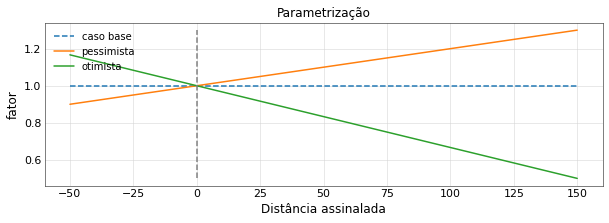

In [9]:
plt_fcd(sd=data['signed_distances_rt_0'], f_min_p=0.9, f_min_o=0.5)

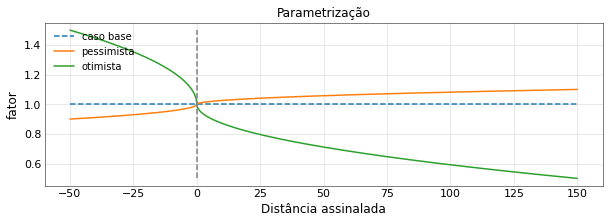

In [10]:
plt_fcd(sd=data['signed_distances_rt_0'], f_min_p=0.9, f_min_o=0.5, f='quadratic')

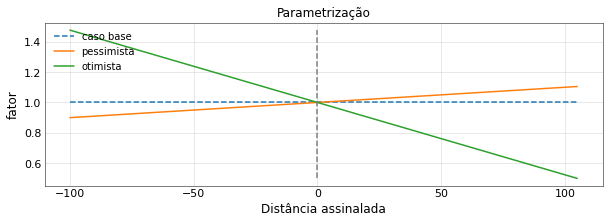

In [11]:
plt_fcd(sd=data['signed_distances_rt_100'], f_min_p=0.9, f_min_o=0.5)

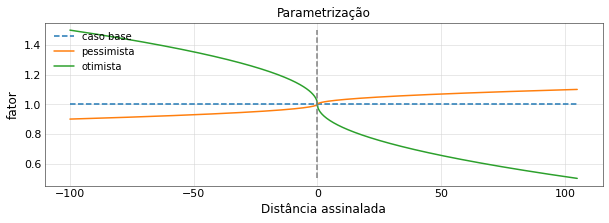

In [12]:
plt_fcd(sd=data['signed_distances_rt_100'], f_min_p=0.9, f_min_o=0.5, f='quadratic')

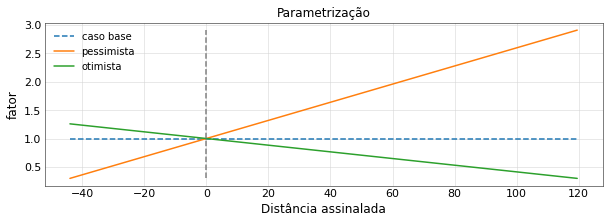

In [15]:
plt_fcd(sd=data['signed_distances_rt_200'], f_min_p=0.3, f_min_o=0.3)

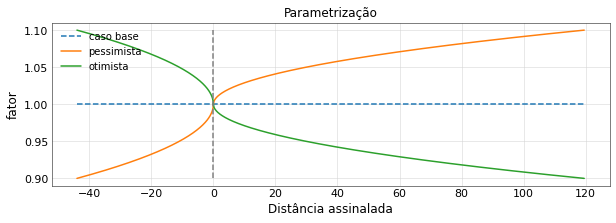

In [14]:
plt_fcd(sd=data['signed_distances_rt_200'], f_min_p=0.9, f_min_o=0.9, f='quadratic')